In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_list = ['131.jpg', '136.jpg', '169.jpg', '170.jpg', '172.jpg','181.jpg', '183.jpg', '187.jpg','188.jpg','193.jpg', '198.jpg', '200.jpg', '201.jpg','221.jpg', '253_1.jpg', '253_2.jpg', '259.jpg', '270.jpg']

In [ ]:
im = cv2.imread(img_list[0], 0)

In [ ]:
def plot_img(img):
  plt.imshow(img, cmap='Greys_r')
  plt.show();

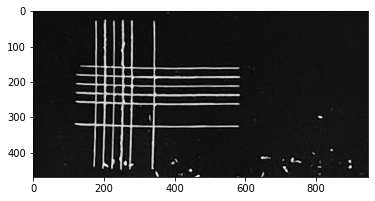

In [ ]:
plot_img(im)

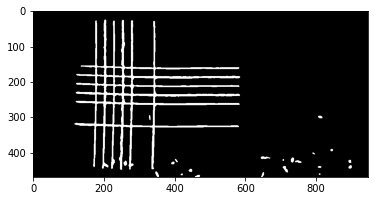

In [ ]:
blur = cv2.cv2.GaussianBlur(im, (3, 3), 0)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plot_img(thresh)

In [ ]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(thresh, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)

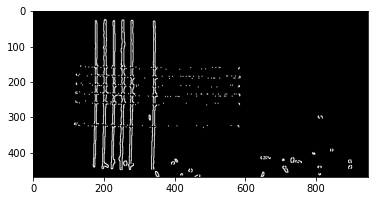

In [ ]:
plot_img(abs_grad_x)

In [ ]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_y = cv2.Sobel(thresh, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_y = cv2.convertScaleAbs(grad_y)

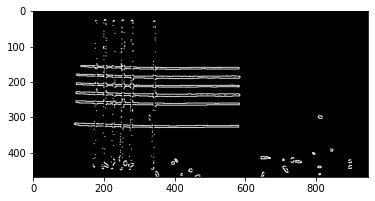

In [ ]:
plot_img(abs_grad_y)

In [ ]:
def eliminate_lignes(img):
  scale = 5
  delta = 5
  ddepth = cv2.CV_64F
  ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  grad_x = cv2.Sobel(thresh, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
  abs_grad_x = cv2.convertScaleAbs(grad_x)
  grad_y = cv2.Sobel(abs_grad_x, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
  abs_grad_y = cv2.convertScaleAbs(grad_y)
  dst = cv2.Laplacian(abs_grad_y, ddepth, ksize=3)
  dst = cv2.convertScaleAbs(dst)
  contours1, hierarchy = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours1:
    cv2.fillPoly(dst, pts=[cnt], color=(255, 255, 255))
  return dst

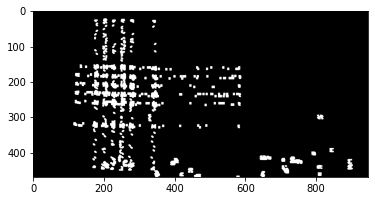

In [ ]:
img = eliminate_lignes(im)
plot_img(img)

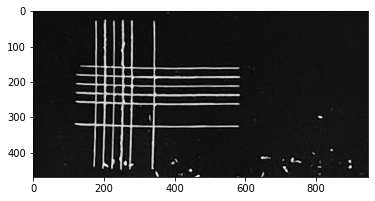

In [ ]:
plot_img(im)

In [ ]:
def houghlignes_eliminate(img):
  blur = cv2.cv2.GaussianBlur(img, (3, 3), 0)
  ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  edges = cv2.Canny(thresh,50,150,apertureSize = 3) 
  
  lines = cv2.HoughLines(edges,1,np.pi/180, 50) 
  print(len(lines))
  for r,theta in lines[0]: 
      
    
    a = np.cos(theta) 
  
    
    b = np.sin(theta) 
      
    
    x0 = a*r 
      
    
    y0 = b*r 
      
    
    x1 = int(x0 + 1000*(-b)) 
      
    
    y1 = int(y0 + 1000*(a)) 
  
    
    x2 = int(x0 - 1000*(-b)) 
      
    
    y2 = int(y0 - 1000*(a)) 
      
    
    
    
    cv2.line(img,(x1,y1), (x2,y2), (0,0,0),2) 
  plot_img(img)

6517


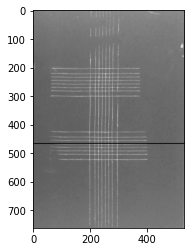

6451


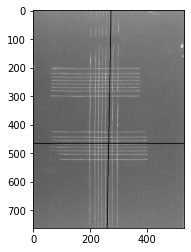

6730


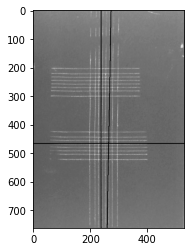

6559


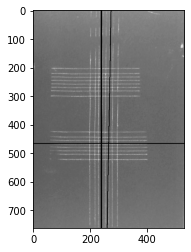

82


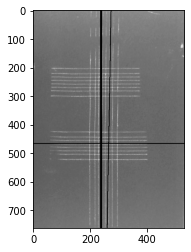

86


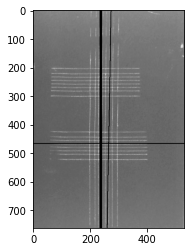

88


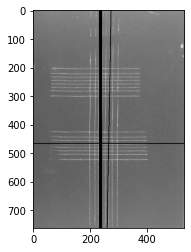

86


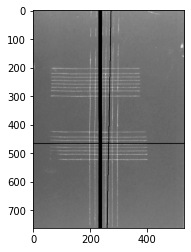

86


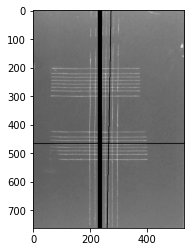

82


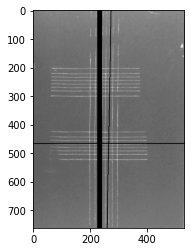

85


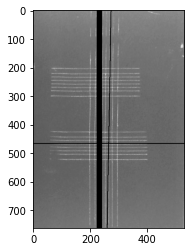

83


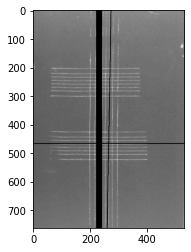

82


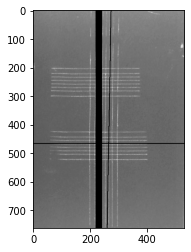

82


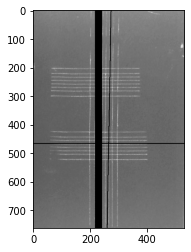

82


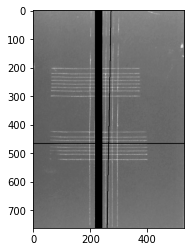

80


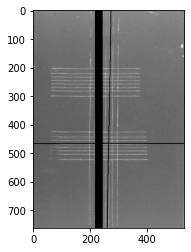

81


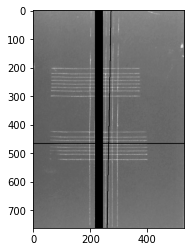

81


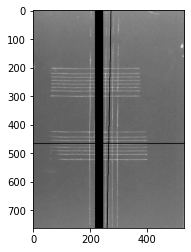

80


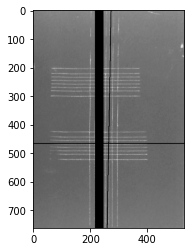

83


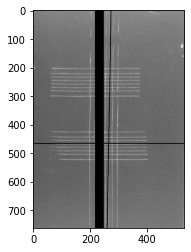

78


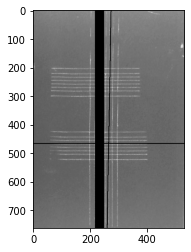

80


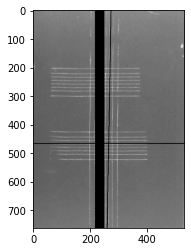

78


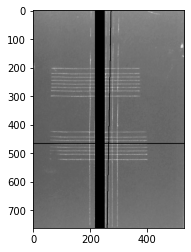

76


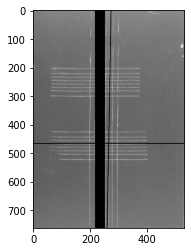

77


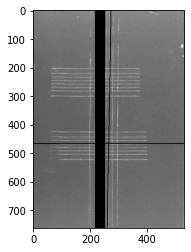

73


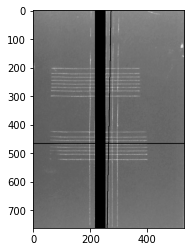

75


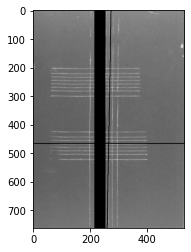

73


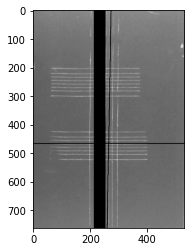

72


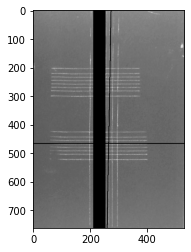

70


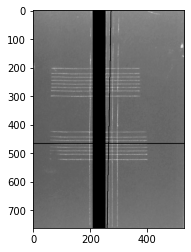

70


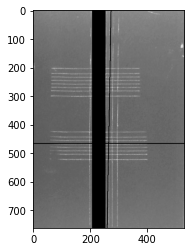

68


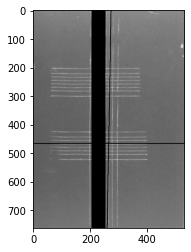

68


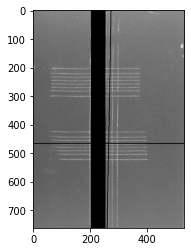

67


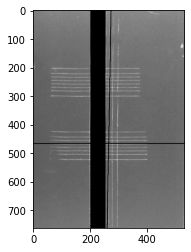

69


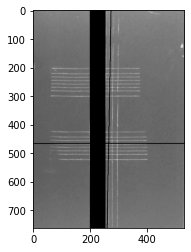

68


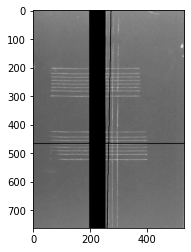

68


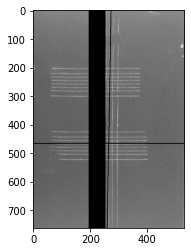

68


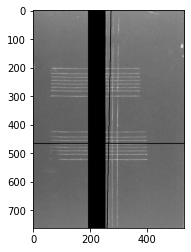

68


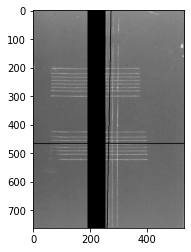

68


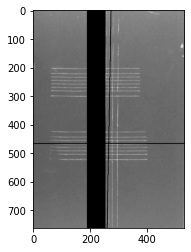

68


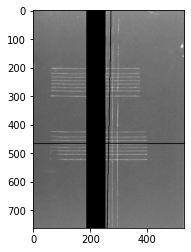

69


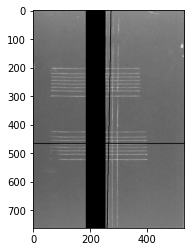

69


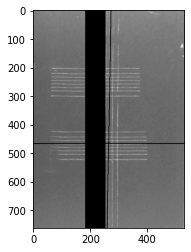

69


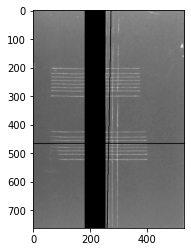

69


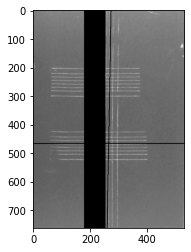

69


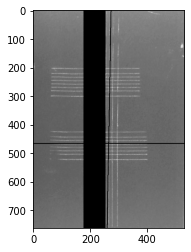

69


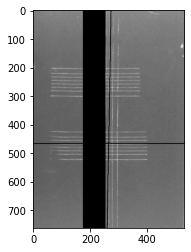

70


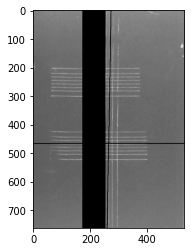

70


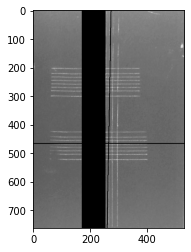

70


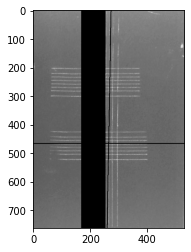

69


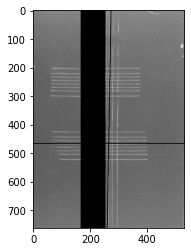

69


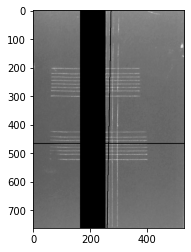

69


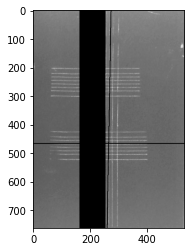

69


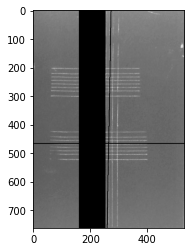

69


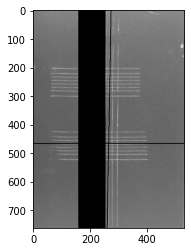

69


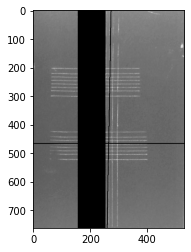

70


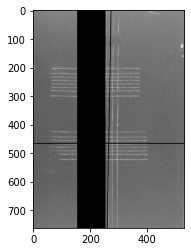

70


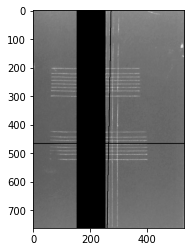

70


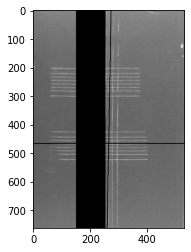

70


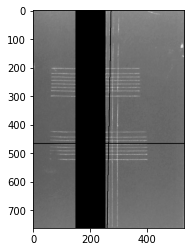

71


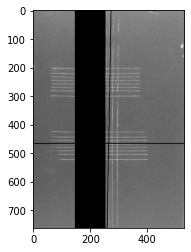

71


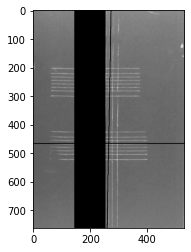

70


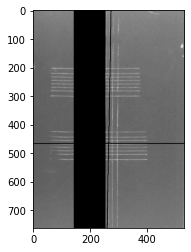

70


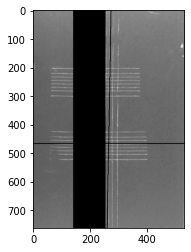

70


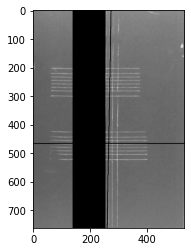

69


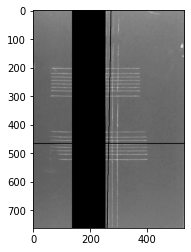

69


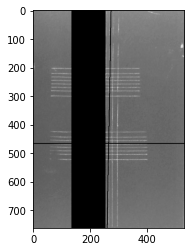

69


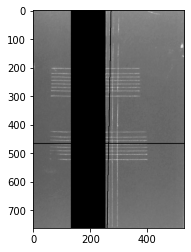

70


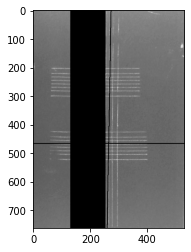

70


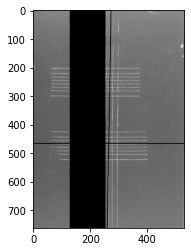

70


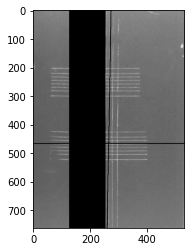

70


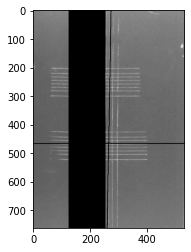

70


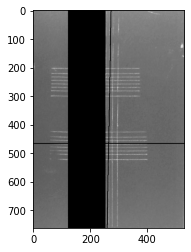

70


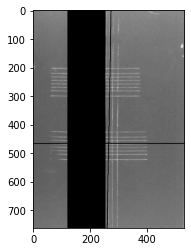

69


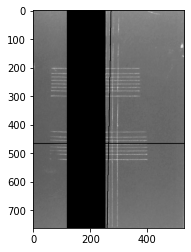

70


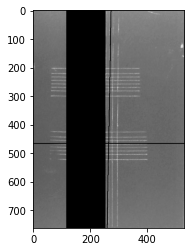

70


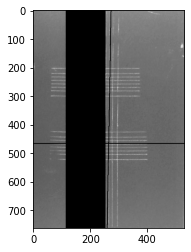

70


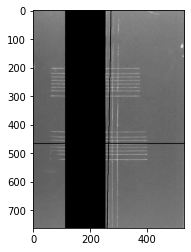

70


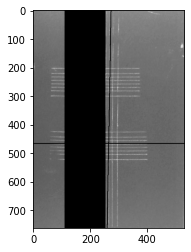

70


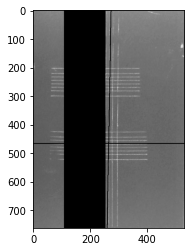

70


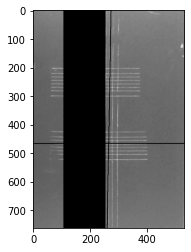

70


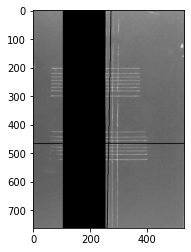

69


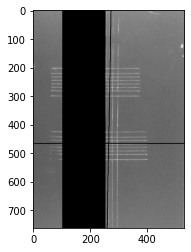

69


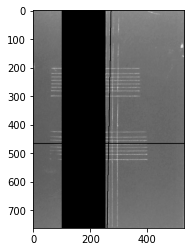

69


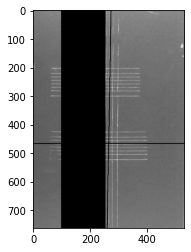

69


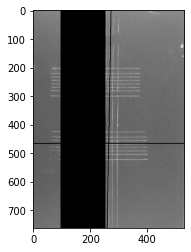

69


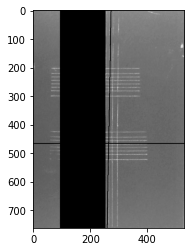

69


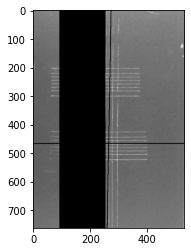

69


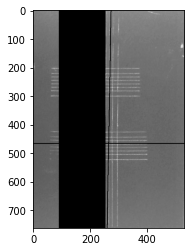

69


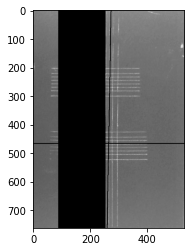

68


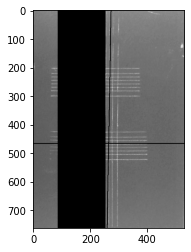

69


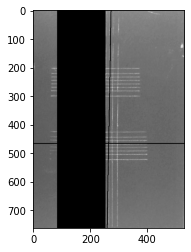

69


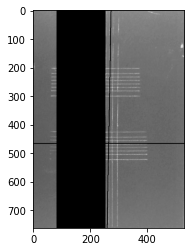

69


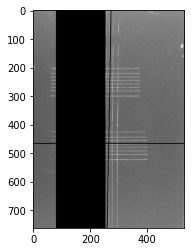

68


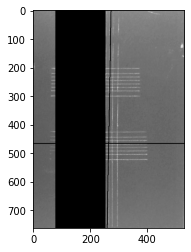

67


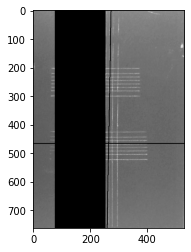

66


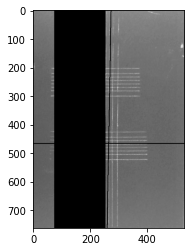

66


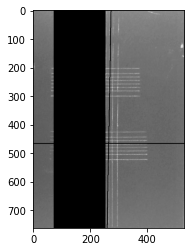

66


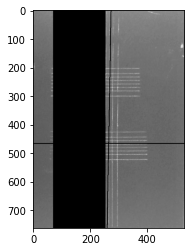

66


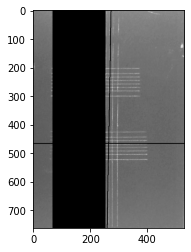

66


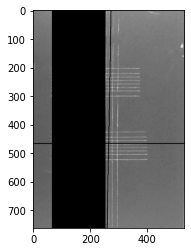

66


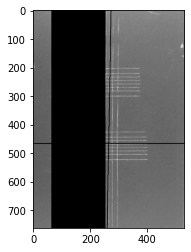

66


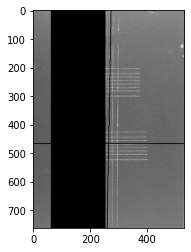

66


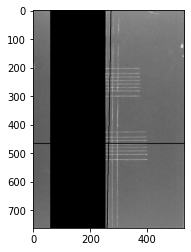

66


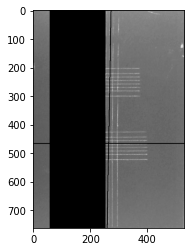

66


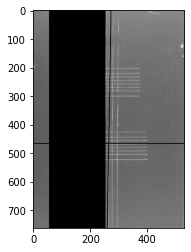

66


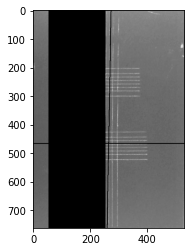

65


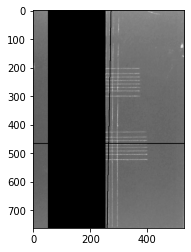

65


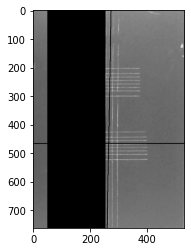

65


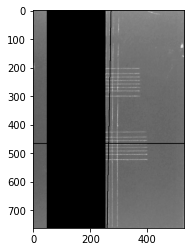

65


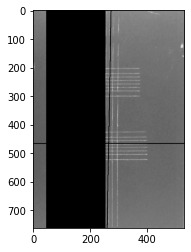

65


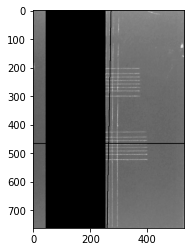

65


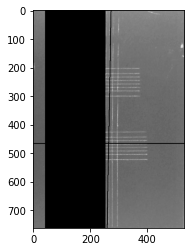

66


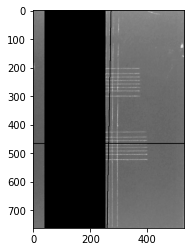

66


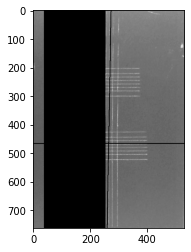

66


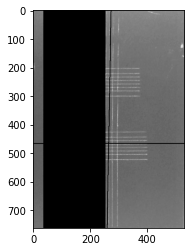

66


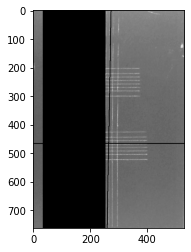

66


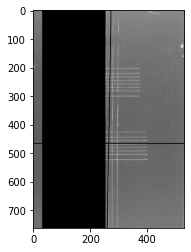

66


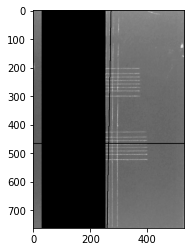

65


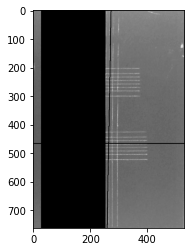

65


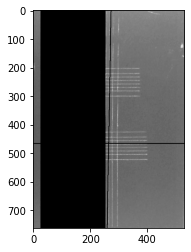

65


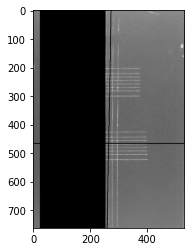

64


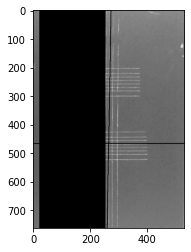

64


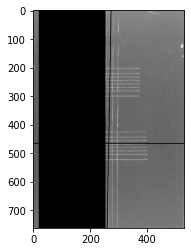

64


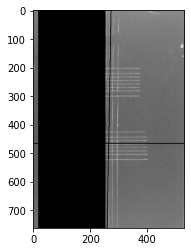

64


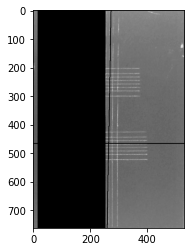

64


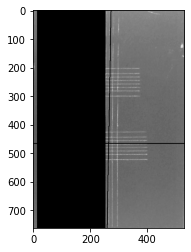

64


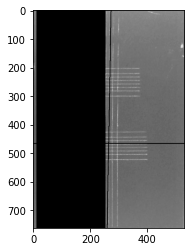

64


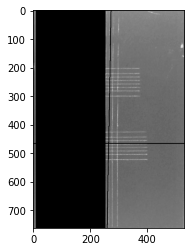

64


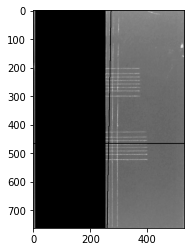

64


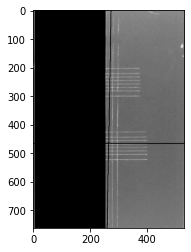

64


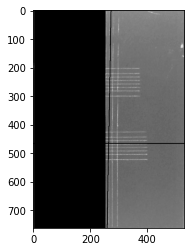

64


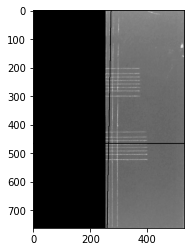

66


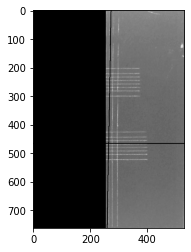

65


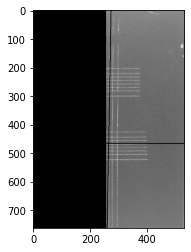

61


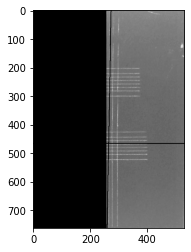

59


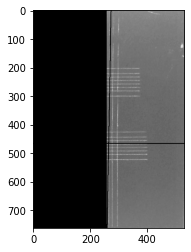

57


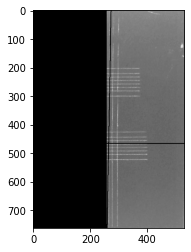

49


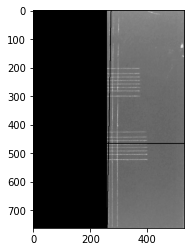

44


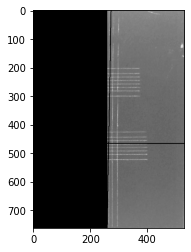

43


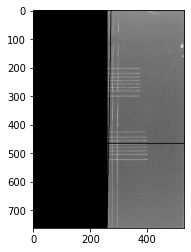

41


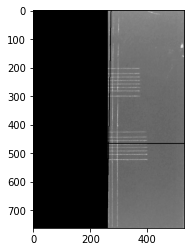

36


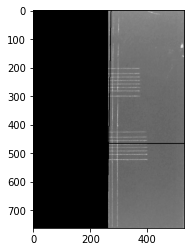

37


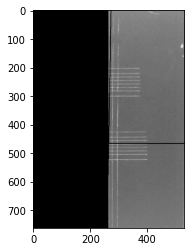

31


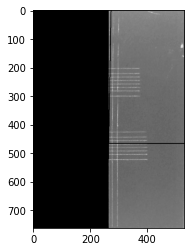

31


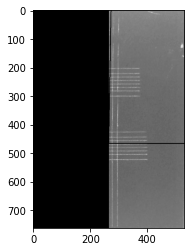

26


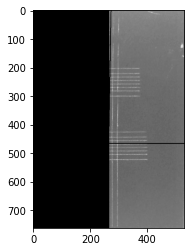

29


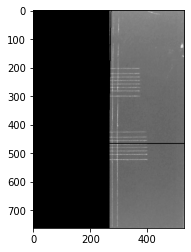

26


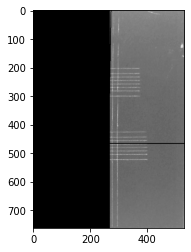

22


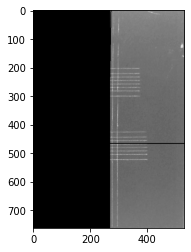

24


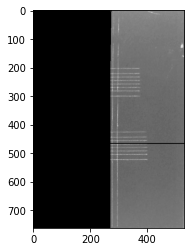

21


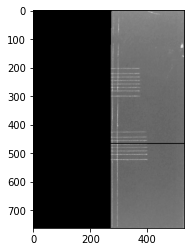

20


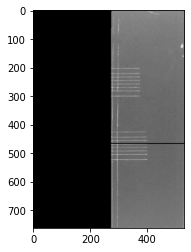

21


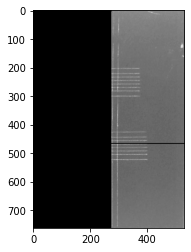

21


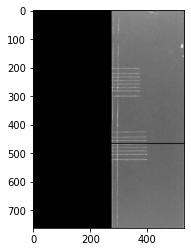

21


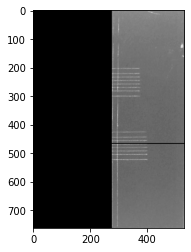

21


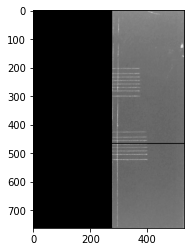

21


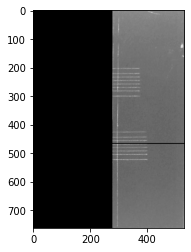

21


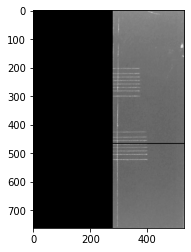

21


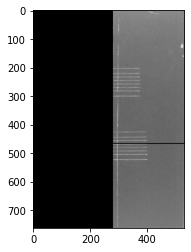

21


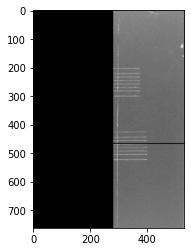

21


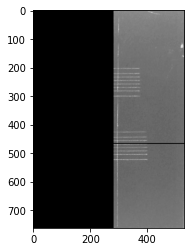

20


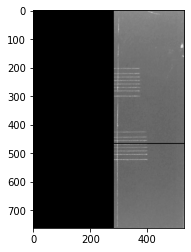

20


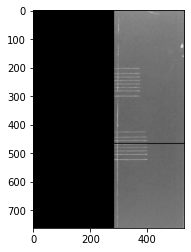

20


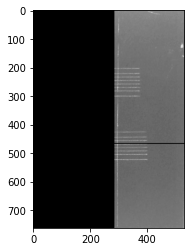

21


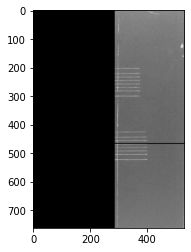

21


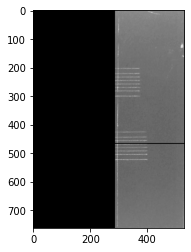

21


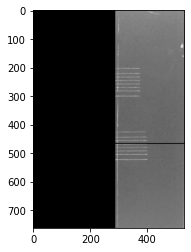

21


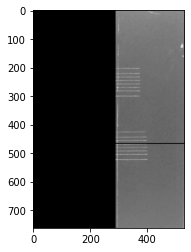

21


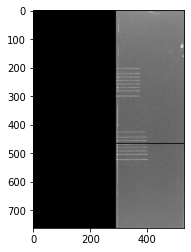

21


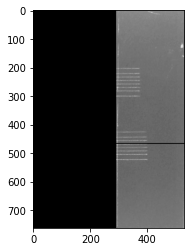

21


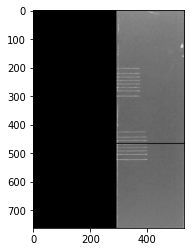

21


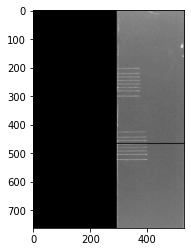

21


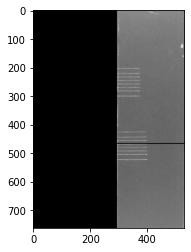

21


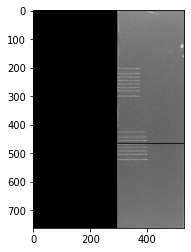

20


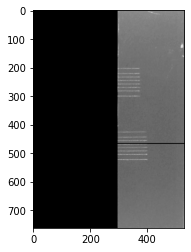

20


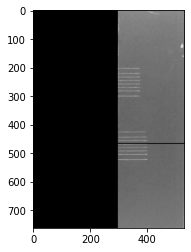

20


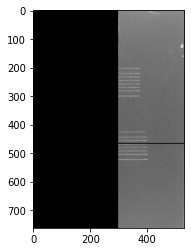

20


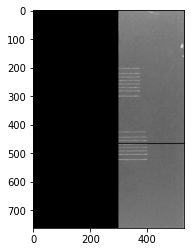

20


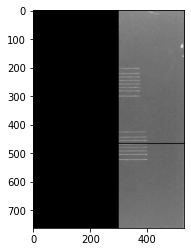

20


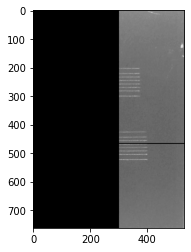

20


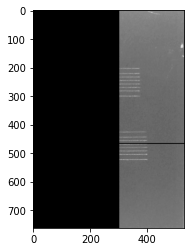

20


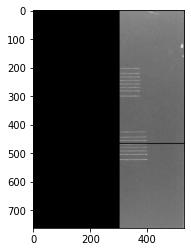

20


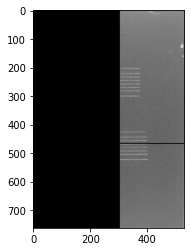

20


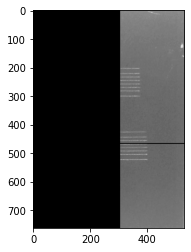

20


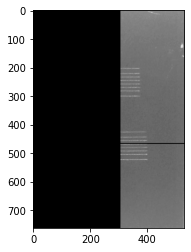

19


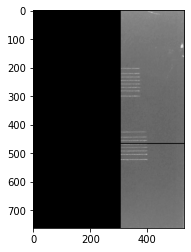

19


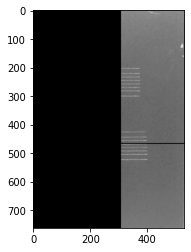

19


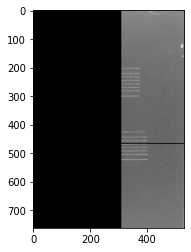

19


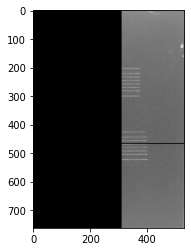

19


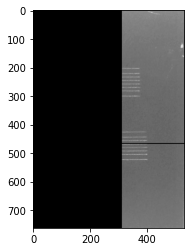

19


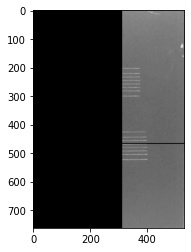

19


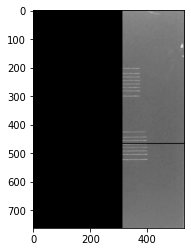

19


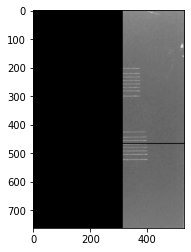

19


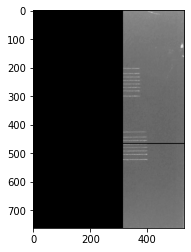

19


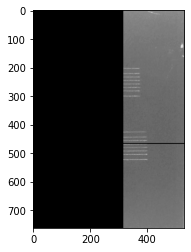

19


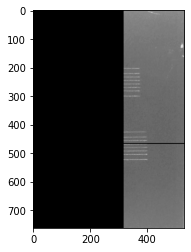

19


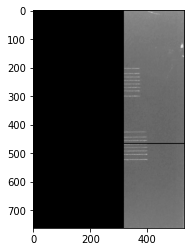

18


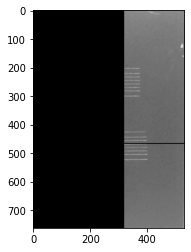

18


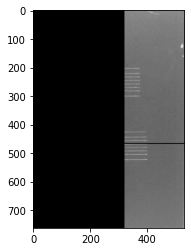

19


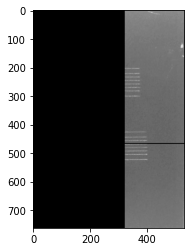

18


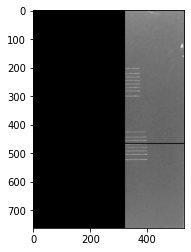

18


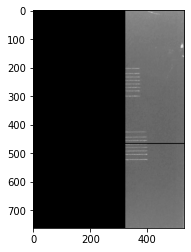

18


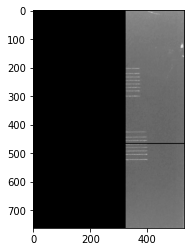

19


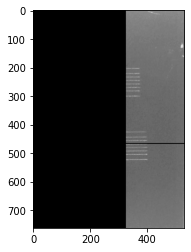

18


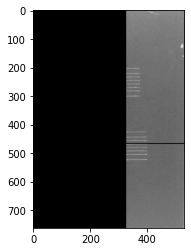

18


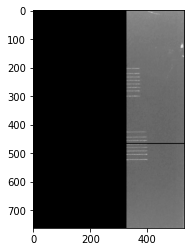

18


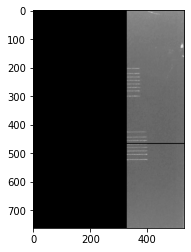

18


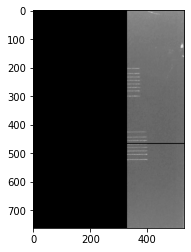

18


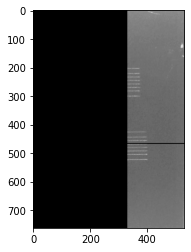

18


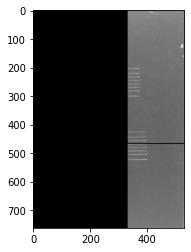

18


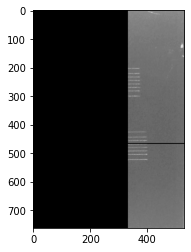

18


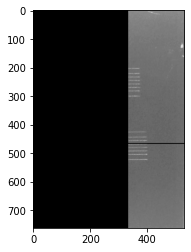

19


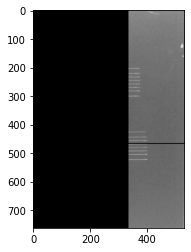

19


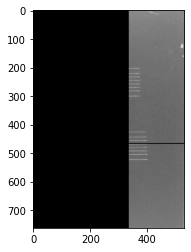

18


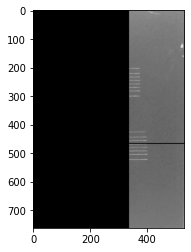

18


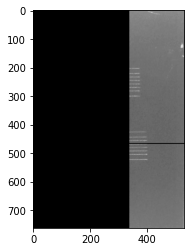

18


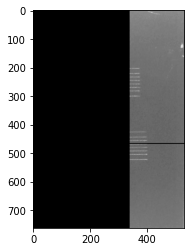

18


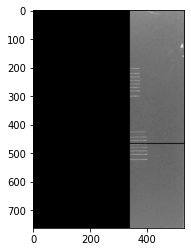

17


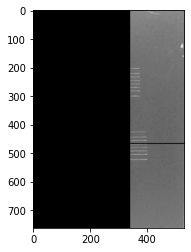

17


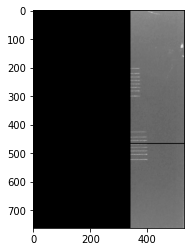

17


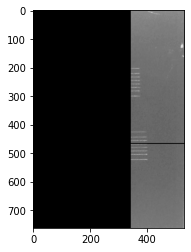

17


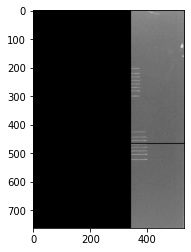

17


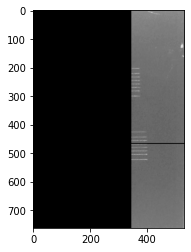

17


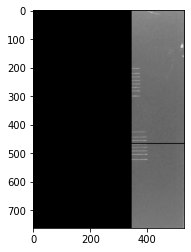

17


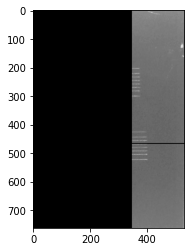

17


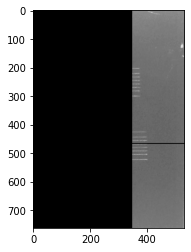

17


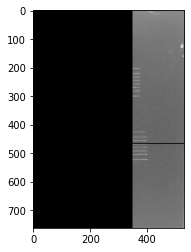

17


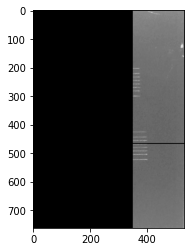

17


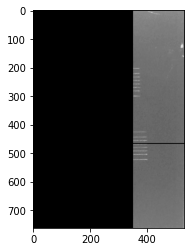

17


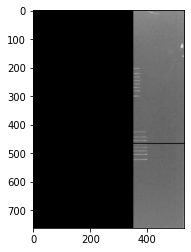

17


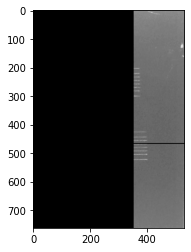

16


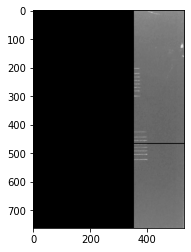

16


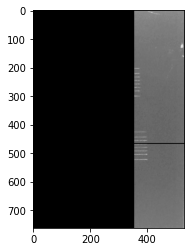

16


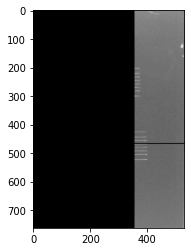

16


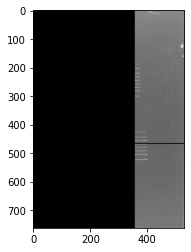

16


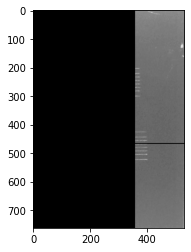

16


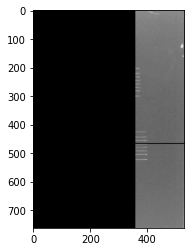

16


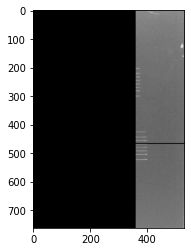

15


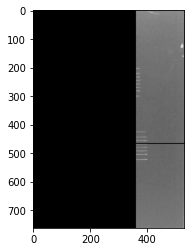

15


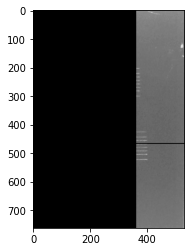

16


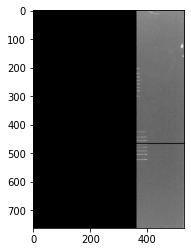

16


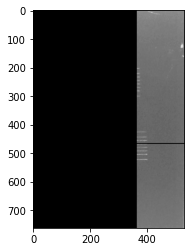

16


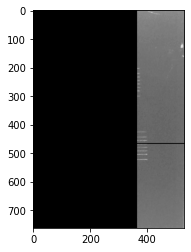

16


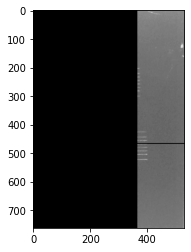

16


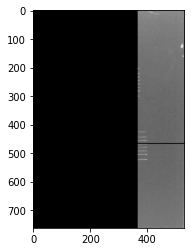

16


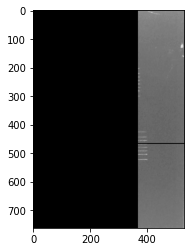

16


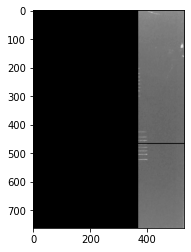

16


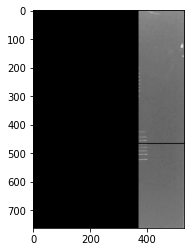

16


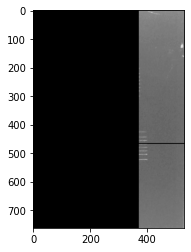

17


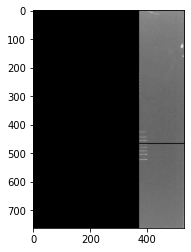

17


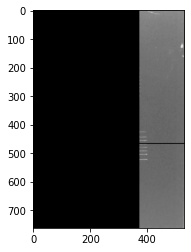

17


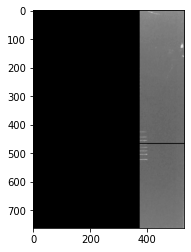

17


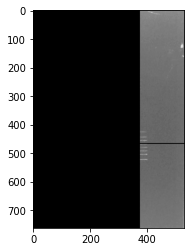

17


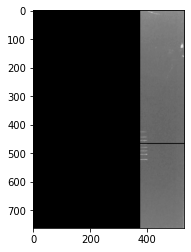

17


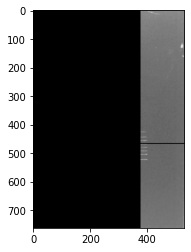

18


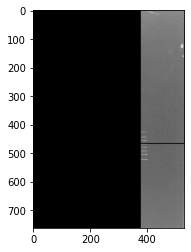

18


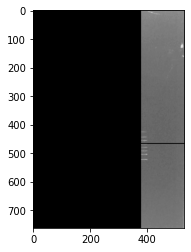

18


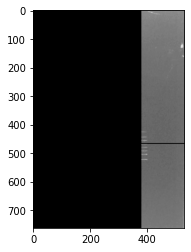

18


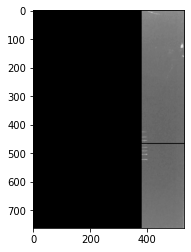

18


KeyboardInterrupt: ignored

In [ ]:
while True:
  houghlignes_eliminate(im)

In [ ]:
def display_lines(img, lines):
  for line in lines:
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 0), 2)
    cv2.circle(img, (x1, y1), 1, (0, 0, 0), 2)
    cv2.circle(img, (x2, y2), 1, (0, 0, 0), 2)
  return img

def eliminate(img):
  blur = cv2.GaussianBlur(img, (3, 3), 0)
  ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  thr_org = thresh
  canny = cv2.Canny(thresh , 0, 255, apertureSize=3, L2gradient=True)

  lines = cv2.HoughLinesP(canny,1,np.pi/180,50, minLineLength=100, maxLineGap=20)
  lines = np.squeeze(lines)
  thresh = display_lines(thresh, lines)

  thresh = cv2.rotate(thresh, cv2.ROTATE_90_CLOCKWISE)
  lines = cv2.HoughLinesP(thresh,1,np.pi/180,50, minLineLength=100, maxLineGap=20)
  lines = np.squeeze(lines)
  thresh = display_lines(thresh, lines)

  thresh = cv2.rotate(thresh, cv2.ROTATE_90_COUNTERCLOCKWISE)

  ret, thresh = cv2.threshold(thresh, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  return thresh


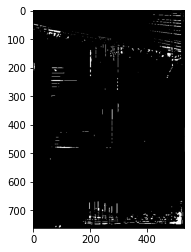

In [ ]:
img = eliminate(im)
plot_img(img)

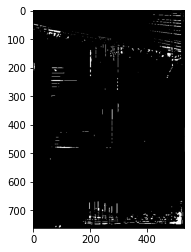

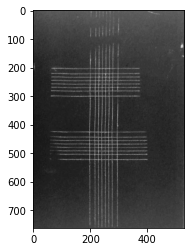

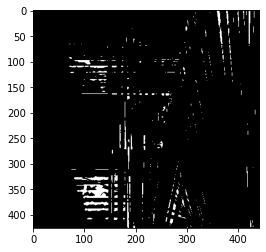

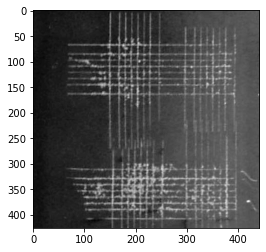

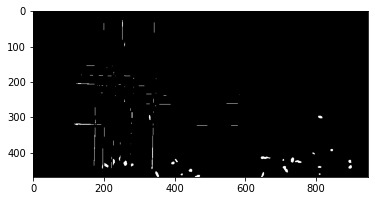

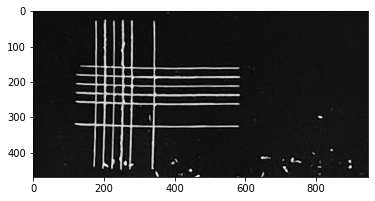

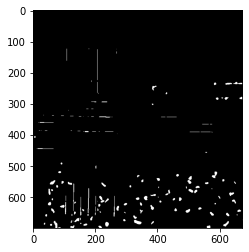

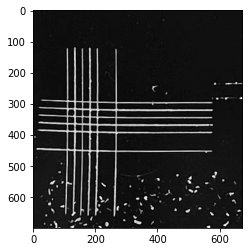

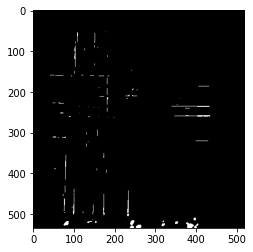

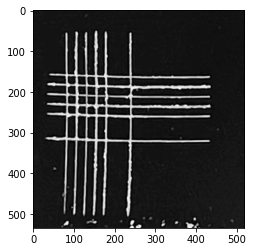

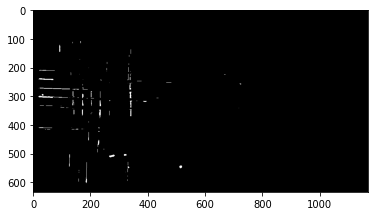

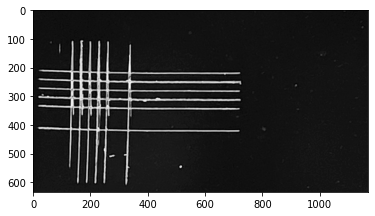

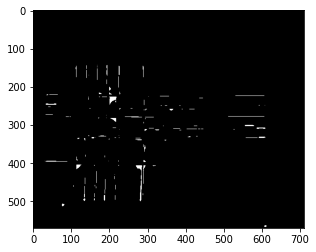

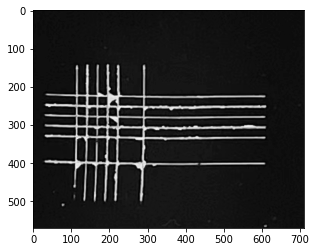

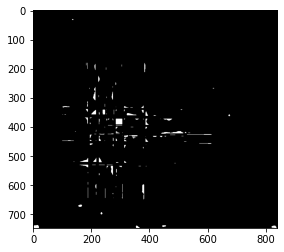

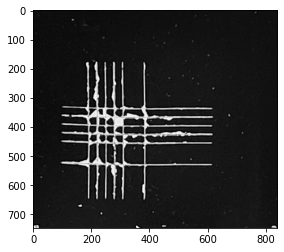

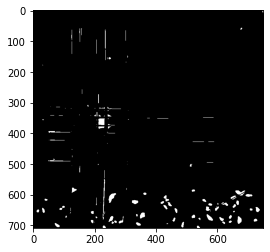

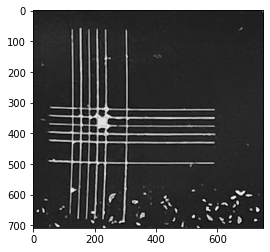

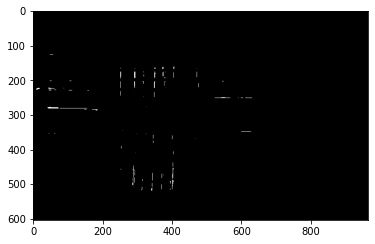

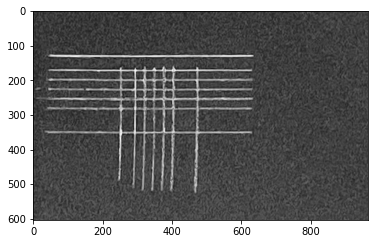

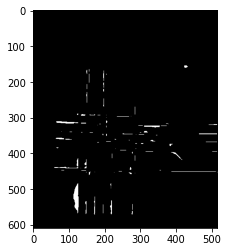

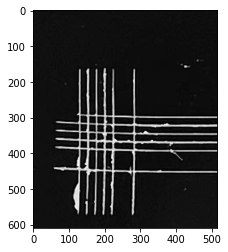

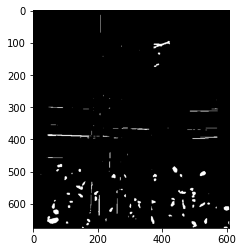

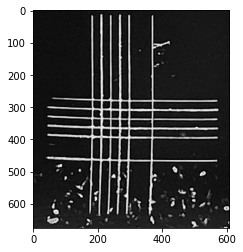

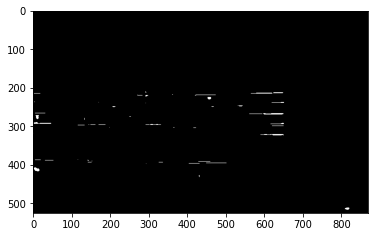

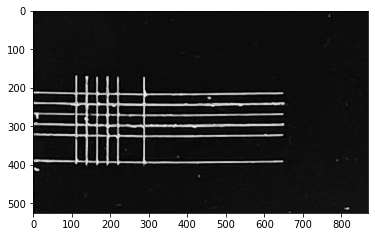

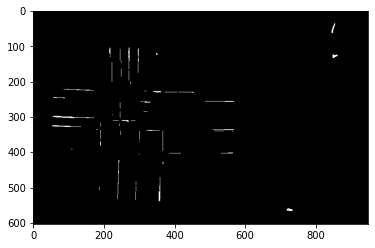

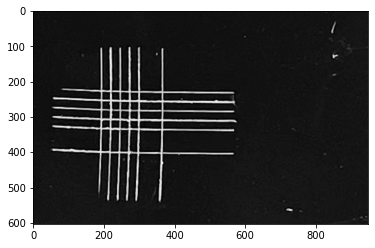

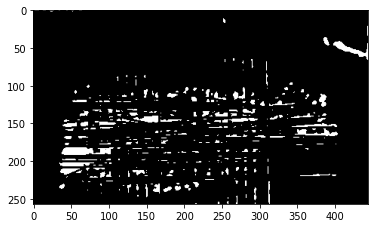

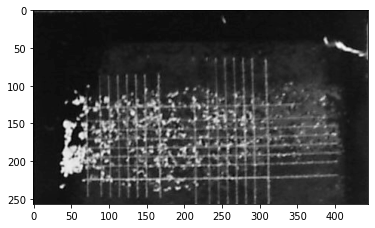

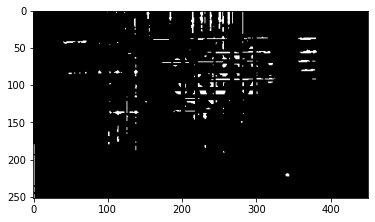

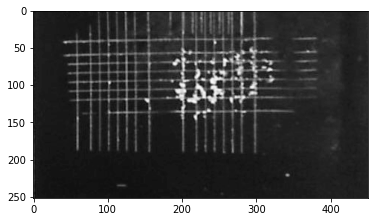

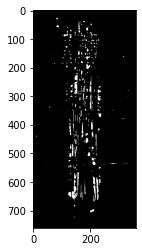

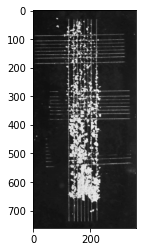

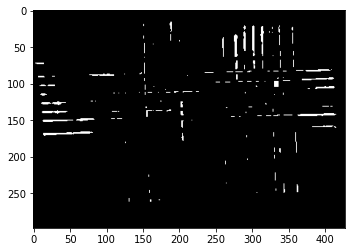

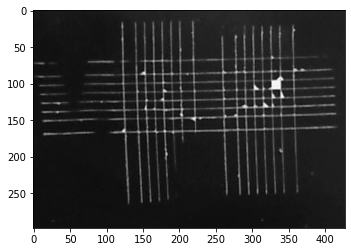

In [ ]:
for i in range(len(img_list)):
  im = cv2.imread(img_list[i], 0)
  img = eliminate(im)
  plot_img(img)
  plot_img(im)

In [ ]:
im = cv2.imread(img_list[0], 0)

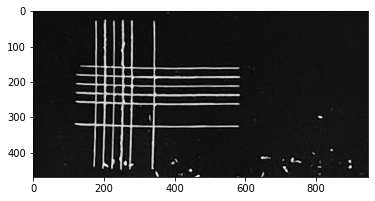

In [ ]:
plot_img(im)

In [ ]:
gray = cv2.bitwise_not(eliminate(im))
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

In [ ]:
horizontal = np.copy(bw)
vertical = np.copy(bw)

In [ ]:
cols = horizontal.shape[1]
horizontal_size = cols // 30

In [ ]:
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

In [ ]:
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

In [ ]:
vertical = np.copy(bw)

In [ ]:
rows = vertical.shape[0]
verticalsize = rows // 30

In [ ]:
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))

In [ ]:
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)

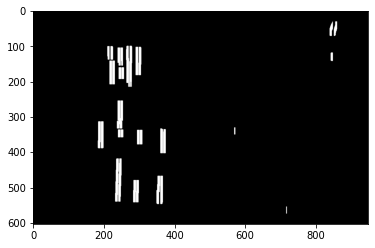

In [ ]:
# Step 1
edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -2)
# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv2.dilate(edges, kernel)
# Step 3
smooth = np.copy(vertical)
# Step 4
smooth = cv2.blur(smooth, (2, 2))
# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
plot_img(vertical)

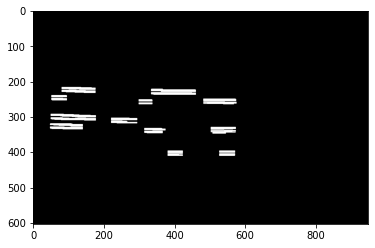

In [ ]:
# Step 1
edges = cv2.adaptiveThreshold(horizontal, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -2)
# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv2.dilate(edges, kernel)
# Step 3
smooth = np.copy(horizontal)
# Step 4
smooth = cv2.blur(smooth, (2, 2))
# Step 5
(rows, cols) = np.where(edges != 0)
horizontal[rows, cols] = smooth[rows, cols]
plot_img(horizontal)

In [ ]:
vertical == horizontal

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [22]:
img = cv2.imread('/content/quad_test.jpg', 0)
def display_lines(img, lines):
  for line in lines:
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 0), 2)
    cv2.circle(img, (x1, y1), 1, (0, 0, 0), 2)
    cv2.circle(img, (x2, y2), 1, (0, 0, 0), 2)
  return img
blur = cv2.bilateralFilter(img,9,75,75)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
canny = cv2.Canny(thresh, 30, 300, apertureSize=3, L2gradient=True)
lines = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=20)
lines = np.squeeze(lines)
thresh = display_lines(thresh, lines)
while True:
  thresh = cv2.rotate(thresh, cv2.ROTATE_90_CLOCKWISE)
  lines = cv2.HoughLinesP(thresh, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=20)
  l = [lines]
  if lines == None:
    break
  lines = np.squeeze(lines)
  thresh = display_lines(thresh, lines)
  thresh = cv2.rotate(thresh, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(thresh, cmap='Greys_r')
plt.show()

ValueError: ignored